In [ ]:
from fov import FOV
from queue import Queue
import numpy as np
from matplotlib import pyplot as plt
#from napari import Viewer
import numpy as np
from queue import Queue
from pymmcore_plus import CMMCorePlus
from useq import MDAEvent
from useq._channel import Channel
#from MDAEngine_DMD import MDAEngine_DMD
import pandas as pd
import random
from utils import ImgType, MetadataDict
#from stimulation import StimExtraParameters
#from dmd import DMD
from hardware import load_config
import os
from datetime import datetime
import napari
import pymmcore_widgets
#import dmd

import skimage


# from tracking import TrackerTrackpy
# from controller import Controller, Analyzer

from utils import create_folders
import numpy as np
import pymmcore_plus

import time

from useq._mda_event import SLMImage


mmc = pymmcore_plus.CMMCorePlus()
mmc.loadSystemConfiguration("E:\\MicroManagerConfigs\\Ti2CicercoConfig_w_DMD_6_w_spectra.cfg")
#mmc.loadSystemConfiguration("C:\\Program Files\\Micro-Manager-2.0\\MMConfig_demo_SLM.cfg")


In [3]:
viewer = napari.Viewer()
data_mda = pymmcore_widgets.MDAWidget()
viewer.window.add_plugin_dock_widget("napari-micromanager")
viewer.window.add_dock_widget(data_mda, area="right")

## create a DF with all planned acquisitions and stimulations

In [ ]:
LEDShutter - State - 1
LEDDMD - Cyan_Level - 20
LEDDMD - Cyan_Enable - 1
LEDDMD - State - 1
LightPath - State - 3
FilterTurret1 - State - 4
LED/ao16 - Voltage - 0
Core - Shutter - LEDDMD

mmc.setProperty("Core", "Shutter", "LedDMD")
mmc.setProperty("LedDMD", "White_Level", 0)
mmc.setProperty("LEDShutter", "State", 1)
mmc.setProperty("LedDMD", "State", 1)
mmc.setProperty("LedDMD", "Cyan_Level", 10)
mmc.setProperty("LedDMD", "Cyan_Enable", 1)
mmc.setProperty("LightPath", "State", 3)
mmc.setProperty("FilterTurret1", "State", 4)
mmc.setProperty("LappMainBranch1", "State", 0)
mmc.setProperty("LED/ao16", "Voltage", 0)
mmc.setProperty("Turret1Shutter", "State", 1)

In [3]:
camera_dev = mmc.getCameraDevice()
print(camera_dev)

HamamatsuHam_DCAM


In [ ]:
mmc.run_mda(event)

In [11]:

slm_dev = mmc.getSLMDevice()
slm_width = mmc.getSLMWidth(slm_dev)
slm_height = mmc.getSLMHeight(slm_dev)

#create a full on image to test the DMD 
img_255 = (np.ones((slm_height,slm_width))*255).astype(np.uint8)

event_slm_on = MDAEvent(slm_image=SLMImage(data=True))
mmc.mda.run([event_slm_on])

[12/17/24 15:55:16] INFO     MDA Started: GeneratorMDASequence()                                     ]8;id=207831;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=934500;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#329\329]8;;\

                    INFO     slm_image=SLMImage()                                                    ]8;id=616077;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=885416;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    ERROR                                                                            ]8;id=239414;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\_logger.py\_logger.py]8;;\:]8;id=858420;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\_logger.py#162\162]8;;\
                                                                                                                   
                             While emitting signal                                                                 
                             'pymmcore_plus.mda.events._psygnal.MDASignaler.frameReady', a                         
                             AttributeError occurred in a callback:                                                
                                                                                                                   
                               Signal emitted at:                                                                  
                             C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\               
                             mda\_runner.py:307, in _run                                                           
                                 >  self._signals.frameReady.emit(img, event, meta)                                
                                                                                                                   
                               Callback error at:                                                                  
                             C:\Users\Niesen\AppData\Local\Temp\ipykernel_16516\294251152.py:21, in                
                             new_frame                                                                             
                                 >  calibration_images.append(img)                                                 
                                                                                                                   
                                 Local variables:                                                                  
                                    img = array([[2584, 2574, 2380, ..., 2606, 2646, 2824],                        
                                    [23...                                                                         
                                    event = MDAEvent(slm_image=SLMImage())                                         
                                                                                                                   
                             See AttributeError above for original traceback.                                      

                    INFO     MDA Finished: GeneratorMDASequence()                                    ]8;id=178465;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=542332;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#416\416]8;;\

In [ ]:
#p0, p1, p2 = ([2117,  310],[ 150,  294],[1137, 1899])


In [5]:
from skimage.draw import disk

p0, p1, p2 = ([456,380],[304,760],[608,760])
#p0, p1, p2 = ([30,38],[40,70],[60,76])

radius = 5
exposure = 30

events = []
for p in [p0,p1,p2]:
    img_p = np.zeros((slm_height,slm_width)).astype(np.uint8)
    rr, cc = disk((p[1],p[0]), radius)
    img_p[rr,cc] = 255
    event_p = MDAEvent(slm_image=SLMImage(data=img_p,device=slm_dev),exposure=exposure)
    events.append(event_p)

#disconnect previous callbacks
mmc.mda.events.frameReady.disconnect()

calibration_images = []

@mmc.mda.events.frameReady.connect
def new_frame(img: np.ndarray, event: MDAEvent):
    calibration_images.append(img)

mmc.mda.run(events)

[12/17/24 15:49:42] INFO     MDA Started: GeneratorMDASequence()                                     ]8;id=792738;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=753155;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#329\329]8;;\

                    INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=797238;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=597079;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

[12/17/24 15:49:43] INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=603303;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=460379;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=956053;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=87344;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    INFO     MDA Finished: GeneratorMDASequence()                                    ]8;id=417480;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=593447;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#416\416]8;;\

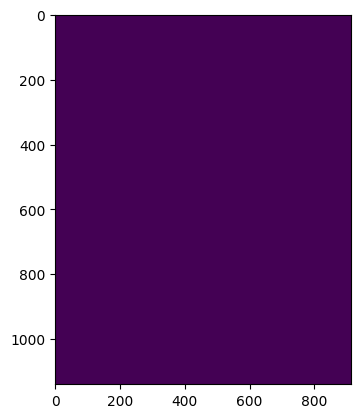

In [6]:
plt.imshow(img_255)
#make sure pixels are square
plt.gca().set_aspect('equal', adjustable='box')

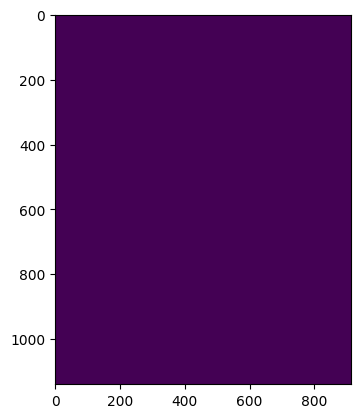

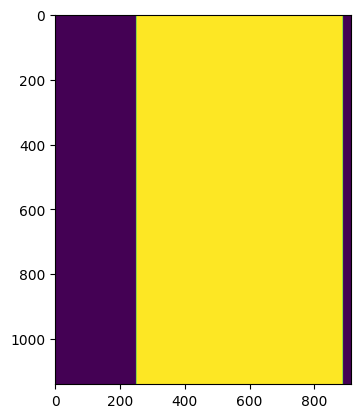

In [7]:
slm_width = mmc.getSLMWidth(slm_dev)
slm_height = mmc.getSLMHeight(slm_dev)

#create a full image to test the DMD
img_255 = (np.ones((slm_height,slm_width))*255).astype(np.uint8)

plt.imshow(img_255)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

img_255[:,:250] = 0 #crop away the bottom part of the DMD
img_255[:,-25:] = 0 #crop away the top left part of the DMD

plt.imshow(img_255)
#make sure pixels are square
plt.gca().set_aspect('equal', adjustable='box')

valid_pixels = np.where(img_255>0)

mmc.setSLMImage(slm_dev, img_255)

In [8]:
valid_pixels = np.array(np.where(img_255>0)).T

src = []
event_p = []
events = []

for i in range(10):
    img_p = np.zeros((slm_height,slm_width)).astype(np.uint8)
    p = random.choice(valid_pixels)
    src.append((p[1],p[0]))
    rr, cc = disk((p[0],p[1]), radius)
    img_p[rr,cc] = 255
    event_p = MDAEvent(slm_image=SLMImage(data=img_p,device=slm_dev),exposure=exposure)
    events.append(event_p)

#disconnect previous callbacks
calibration_images = []
mmc.mda.events.frameReady.disconnect()
@mmc.mda.events.frameReady.connect
def new_frame(img: np.ndarray, event: MDAEvent):
    calibration_images.append(img)
mmc.mda.run(events)

[12/17/24 15:50:19] INFO     MDA Started: GeneratorMDASequence()                                     ]8;id=854286;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=961480;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#329\329]8;;\

                    INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=71250;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=769493;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

[12/17/24 15:50:20] INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=296332;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=568632;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=894730;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=348124;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=424102;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=600910;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=308469;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=271477;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=78958;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=811223;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=655773;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=823046;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=768853;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=153174;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=81376;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=100776;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

[12/17/24 15:50:21] INFO     exposure=30.0 slm_image=SLMImage(device='MightexPolygon1000')           ]8;id=924657;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=842163;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

                    INFO     MDA Finished: GeneratorMDASequence()                                    ]8;id=400700;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=453468;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#416\416]8;;\

In [9]:
import skimage
calibration_images = np.array(calibration_images)
dst = []
for img in calibration_images:
    #add gaussian filter
    img = skimage.filters.gaussian(img, sigma=1)
    max_x = np.argmax(img.max(axis=0))
    max_y = np.argmax(img. max(axis=1))
    dst.append((max_x,max_y))

dst_napari = np.array(dst)[:,:]
dst_napari[:,0] = np.array(dst)[:,1]
dst_napari[:,1] = np.array(dst)[:,0]
viewer.add_image(np.max(calibration_images,axis=0))
viewer.add_points(dst_napari, size=20, face_color='#00000000', edge_color='red')

c:\Users\Niesen\.conda\envs\pymmcore-lucien\lib\site-packages\napari\utils\migrations.py:101: FutureWarning: Argument 'edge_color' is deprecated, please use 'border_color' instead. The argument 'edge_color' was deprecated in 0.5.0 and it will be removed in 0.6.0.
  return func(*args, **kwargs)


<Points layer 'dst_napari' at 0x25eda03d7e0>

In [9]:

src = np.array(src)
dst = np.array(dst)

affine = skimage.transform.estimate_transform('affine', src, dst)


In [10]:
slm_width

912

In [19]:
viewer.layers['Shapes'].data[0]

array([[ 918.93903423, 1078.14690776],
       [ 918.93903423, 1562.14899823],
       [1259.88631963, 1562.14899823],
       [1259.88631963, 1078.14690776]])

In [21]:
img_project = viewer.layers['Shapes'].data[0]*255
img_project = img_project.astype(np.uint8)
img_warp = skimage.transform.warp(img_project, affine, output_shape=(slm_height,slm_width), order=None, mode='constant', cval=0.0, clip=True, preserve_range=True)

#display img_warp on the DMD
img_warp = img_warp.astype(np.uint8)
mmc.setSLMImage(slm_dev, img_warp)


In [220]:
img_warp.max()

np.uint8(1)

In [12]:
#display img_warp on the DMD
img_warp = (img_warp*0).astype(np.uint8)
mmc.setSLMImage(slm_dev, img_warp)

NameError: name 'img_warp' is not defined

In [231]:
points_detected = []
for img in calibration_images:
    max_y = np.argmax(img.max(axis=0))
    max_x = np.argmax(img.max(axis=1))
    points_detected.append((max_x,max_y))

viewer.add_image(calibration_images[0],blending='additive',name='dmd_cal_img_0')
viewer.add_image(calibration_images[1],blending='additive',name='dmd_cal_img_1')
viewer.add_image(calibration_images[2],blending='additive',name='dmd_cal_img_2')

viewer.add_points(points_detected,face_color='red',size=30, symbol='ring',name='dmd_cal_points')

<Points layer 'dmd_cal_points' at 0x29dfbbf7df0>

In [ ]:
p0, p1, p2 = ([2117,  310],[ 150,  294],[1137, 1899])


array([[2117,  310],
       [ 150,  294],
       [1137, 1899]], dtype=int32)

[12/02/24 11:34:12] INFO     MDA Started: GeneratorMDASequence()                                     ]8;id=952527;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=160785;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#329\329]8;;\

                    INFO     exposure=100.0 slm_image=SLMImage(device='MightexPolygon1000')          ]8;id=205019;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=675393;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

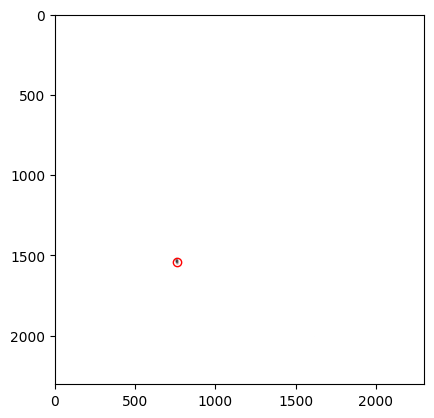

[12/02/24 11:34:13] INFO     exposure=100.0 slm_image=SLMImage(device='MightexPolygon1000')          ]8;id=520304;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=312553;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\

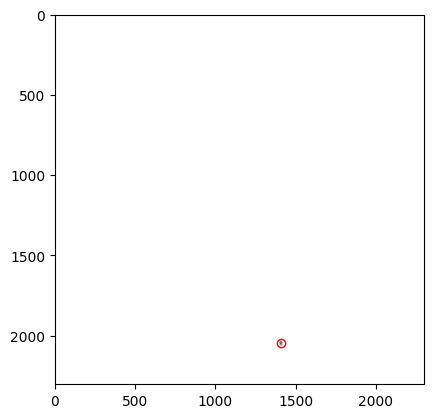

[12/02/24 11:34:14] INFO     exposure=100.0 slm_image=SLMImage(device='MightexPolygon1000')          ]8;id=644430;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=915888;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\
                             events=(MDAEvent(exposure=100.0,                                                      
                             slm_image=SLMImage(device='MightexPolygon1000')),                                     
                             MDAEvent(exposure=100.0,                                                              
                             slm_image=SLMImage(device='MightexPolygon1000')),                                     
                             MDAEvent(exposure=100.0,                                                              
                             slm_image=SLMImage(device='MightexPolygon1000')),                                     
                             MDAEvent(exposure=100.0,                                                              
                             slm_image=SLMImage(device='MightexPolygon1000')),                                     
                             MDAEvent(exposure=100.0,                                                              
                             slm_image=SLMImage(device='MightexPolygon1000')),                                     
                             MDAEvent(exposure=100.0,                                                              
                             slm_image=SLMImage(device='MightexPolygon1000'))) exposure_sequence=()                
                             x_sequence=() y_sequence=() z_sequence=()                                             

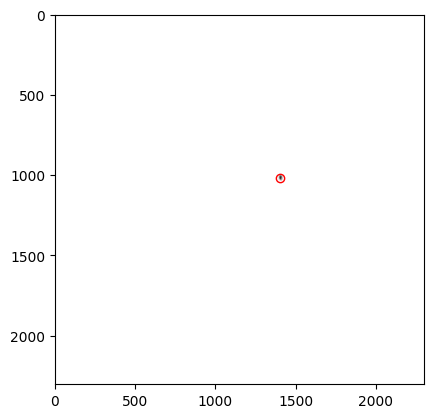

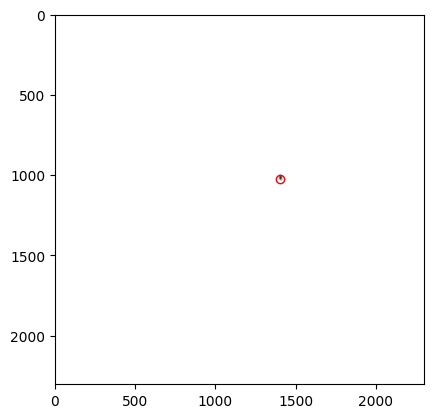

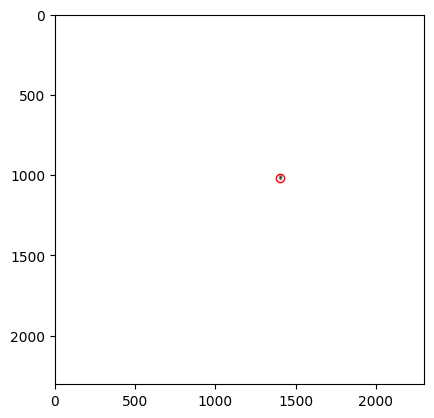

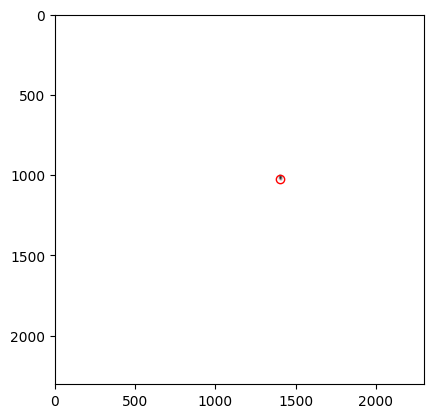

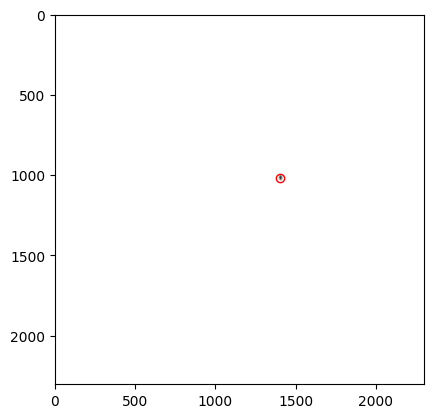

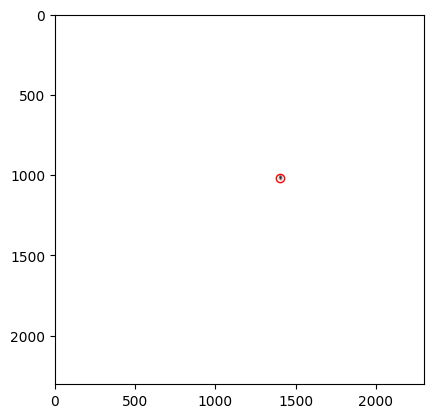

[12/02/24 11:34:16] INFO     MDA Finished: GeneratorMDASequence()                                    ]8;id=537155;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=618036;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#416\416]8;;\

In [17]:


from skimage.draw import disk

p0, p1, p2 = ([456,380],[304,760],[608,760])
radius = 5
exposure = 100

events = []
for p in [p0,p1,p2,p2,p2,p2,p2,p2]:
    img_p = np.zeros((slm_height,slm_width)).astype(np.uint8)
    rr, cc = disk((p[1],p[0]), radius)
    img_p[rr,cc] = 255
    event_p = MDAEvent(slm_image=SLMImage(data=img_p,device=slm_dev),exposure=exposure)
    events.append(event_p)

#disconnect previous callbacks
mmc.mda.events.frameReady.disconnect()

@mmc.mda.events.frameReady.connect
def new_frame(img: np.ndarray, event: MDAEvent):
    #find max value x/y
    max_x = np.argmax(img.max(axis=0))
    max_y = np.argmax(img.max(axis=1))
    plt.imshow(img,cmap='gray_r',vmin=np.median(img),vmax=np.max(img))
    plt.scatter(max_x,max_y,color='#00000000',marker='o',edgecolor='red')
    plt.show()

mmc.mda.run(events)


In [ ]:
#create a full OFF image to test the DMD
img_255 = (np.ones((slm_height,slm_width))*255).astype(np.uint8)
event_slm_all_on = MDAEvent(slm_image=SLMImage(data=img_255,device=slm_dev))
mmc.mda.run([event_slm_all_on])



[11/25/24 18:18:08] INFO     MDA Started: GeneratorMDASequence()                                     ]8;id=348070;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=584552;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#329\329]8;;\

                    INFO     index=mappingproxy({}) channel=None exposure=None min_start_time=None   ]8;id=9400;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=517062;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\
                             pos_name=None x_pos=None y_pos=None z_pos=None                                        
                             slm_image=SLMImage(data=array([[255, 255, 255, ..., 255, 255, 255],                   
                                    [255, 255, 255, ..., 255, 255, 255],                                           
                                    [255, 255, 255, ..., 255, 255, 255],                                           
                                    ...,                                                                           
                                    [255, 255, 255, ..., 255, 255, 255],                                           
                                    [255, 255, 255, ..., 255, 255, 255],                                           
                                    [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),                            
                             device='MightexPolygon1000', exposure=None) properties=None metadata={}               
                             action=AcquireImage(type='acquire_image') keep_shutter_open=False                     
                             reset_event_timer=False                                                               

[11/25/24 18:18:09] INFO     MDA Finished: GeneratorMDASequence()                                    ]8;id=350797;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=699439;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#416\416]8;;\

In [7]:
#create a full OFF image to test the DMD
event_slm_all_on = MDAEvent(slm_image=SLMImage(data=img_zeros,device=slm_dev))
mmc.mda.run([event_slm_all_on])

                    INFO     MDA Started: GeneratorMDASequence()                                     ]8;id=980465;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=494699;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#329\329]8;;\

                    INFO     index=mappingproxy({}) channel=None exposure=None min_start_time=None   ]8;id=658647;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=387135;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#290\290]8;;\
                             pos_name=None x_pos=None y_pos=None z_pos=None                                        
                             slm_image=SLMImage(data=array([[0, 0, 0, ..., 0, 0, 0],                               
                                    [0, 0, 0, ..., 0, 0, 0],                                                       
                                    [0, 0, 0, ..., 0, 0, 0],                                                       
                                    ...,                                                                           
                                    [0, 0, 0, ..., 0, 0, 0],                                                       
                                    [0, 0, 0, ..., 0, 0, 0],                                                       
                                    [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),                                        
                             device='MightexPolygon1000', exposure=None) properties=None metadata={}               
                             action=AcquireImage(type='acquire_image') keep_shutter_open=False                     
                             reset_event_timer=False                                                               

                    INFO     MDA Finished: GeneratorMDASequence()                                    ]8;id=607807;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py\_runner.py]8;;\:]8;id=56244;file://C:\Users\Niesen\Documents\lhinder\code\pymmcore-plus\src\pymmcore_plus\mda\_runner.py#416\416]8;;\

In [8]:
from useq._mda_event import SLMImage

In [ ]:
df_acquire = pd.DataFrame(columns=['fov', 'timestep', 'time','time_experiment', 'treatment', 'acquired','stim', 'channels', 'channel_stim'])

path = "C:\\test\\"
create_folders(path,['stim','raw','labels','stim_mask','tracks','labels_rings','particles'])

time_between_frames = 2 #time in seconds between frames
stim_timesteps = [2]  # list of timesteps

timesteps = range(5)  # 0-20
treatments = None
channels = [['DAPI','Cy5']]
channels_exposure = [[200,100]]
channel_stim = ['FITC']
channel_stim_exposures = {"A": 50, "B": 100, "C": 150, "D": 250}
# channel_stim_exposure = [100]

fovs:list[FOV] = []

data_mda_fovs = data_mda.value()

for i, row in enumerate(data_mda_fovs.stage_positions):
    fov = FOV(pos=(row.x, row.y),
              index=i,
              name=row.name,
              path=path,
              metadata={},
              properties={'stim_property': 'global'},
              )
    fovs.append(fov)


for fov in fovs:
    well_column = int(fov.name.split('_')[0][1:])
    well_row = fov.name.split('_')[0][0]
    treatment = None
    cell_lines = ["optoFGFR1", "optoERK1", "optoERK2", "optoTrkA1"]
    cell_line = cell_lines[well_column]
    
    for timestep in timesteps:
        new_row = { 'fov_object': fov,
                    'fov':fov.index,
                    'name':fov.name,
                    'well_row': well_row,
                    'well_column': int(well_column),
                    'cell_line': cell_line,
                    'timestep': timestep,
                    'time': timestep*time_between_frames,
                    'treatment': treatment,
                    'acquired': False,
                    'stim': timestep in stim_timesteps,
                    'channels': channels,
                    'channels_exposure':channels_exposure,
                    'channel_stim' : channel_stim,
                    'channel_stim_exposure' : channel_stim_exposures[well_row],
                    'fname' : f'{str(fov.index).zfill(3)}_{str(timestep).zfill(5)}',
                    }
        df_acquire = pd.concat([df_acquire, pd.DataFrame(new_row, index=[0])])


df_acquire = df_acquire.sort_values(by=['timestep', 'fov'])

df_acquire

Directory C:\teststim already exists
Directory C:\testraw already exists
Directory C:\testlabels already exists
Directory C:\teststim_mask already exists
Directory C:\testtracks already exists
Directory C:\testlabels_rings already exists
Directory C:\testparticles already exists


,fov,timestep,time,time_experiment,treatment,acquired,stim,channels,channel_stim,fov_object,name,well_row,well_column,cell_line,channels_exposure,channel_stim_exposure,fname
0,0,0,0,NaN,None,False,False,"[DAPI, Cy5]",FITC,<fov.FOV object at 0x00000179B31F63D0>,A1_0000,A,1.0,optoERK1,"[200, 100]",50.0,000_00000
0,1,0,0,NaN,None,False,False,"[DAPI, Cy5]",FITC,<fov.FOV object at 0x00000179B2A4C210>,A2_0008,A,2.0,optoERK2,"[200, 100]",50.0,001_00000
0,0,1,2,NaN,None,False,False,"[DAPI, Cy5]",FITC,<fov.FOV object at 0x00000179B31F63D0>,A1_0000,A,1.0,optoERK1,"[200, 100]",50.0,000_00001
0,1,1,2,NaN,None,False,False,"[DAPI, Cy5]",FITC,<fov.FOV object at 0x00000179B2A4C210>,A2_0008,A,2.0,optoERK2,"[200, 100]",50.0,001_00001
0,0,2,4,NaN,None,False,True,"[DAPI, Cy5]",FITC,<fov.FOV object at 0x00000179B31F63D0>,A1_0000,A,1.0,optoERK1,"[200, 100]",50.0,000_00002
0,1,2,4,NaN,None,False,True,"[DAPI, Cy5]",FITC,<fov.FOV object at 0x00000179B2A4C210>,A2_0008,A,2.0,optoERK2,"[200, 100]",50.0,001_00002
0,0,3,6,NaN,None,False,False,"[DAPI, Cy5]",FITC,<fov.FOV object at 0x00000179B31F63D0>,A1_0000,A,1.0,optoERK1,"[200, 100]",50.0,000_00003
0,1,3,6,NaN,None,False,False,"[DAPI, Cy5]",FITC,<fov.FOV object at 0x00000179B2A4C210>,A2_0008,A,2.0,optoERK2,"[200, 100]",50.0,001_00003
0,0,4,8,NaN,None,False,False,"[DAPI, Cy5]",FITC,<fov.FOV object at 0x00000179B31F63D0>,A1_0000,A,1.0,optoERK1,"[200, 100]",50.0,000_00004
0,1,4,8,NaN,None,False,False,"[DAPI, Cy5]",FITC,<fov.FOV object at 0x00000179B2A4C210>,A2_0008,A,2.0,optoERK2,"[200, 100]",50.0,001_00004


In [ ]:
import useq
import queue
class Controller:
    STOP_EVENT = object()

    def __init__(self, mmc: CMMCorePlus, queue: Queue, dmd: DMD=None):
        self._queue = queue  # queue of MDAEvents
        self._results: dict = {}  # results of analysis
        self._mmc = mmc
        self._frame_buffer = [] # buffer to hold the frames until one sequence is complete
        self._dmd = dmd
        mmc.mda.events.frameReady.connect(self._on_frame_ready)


    def _on_frame_ready(self, img: np.ndarray, event: MDAEvent) -> None:
        # Analyze the image
        self._frame_buffer.append(img)
        
        # check if it's the last acquisition for this MDAsequence
        if event.metadata['last_channel']:
            frame_complete = np.stack(self._frame_buffer, axis=-1)
            #move new axis to the first position
            frame_complete = np.moveaxis(frame_complete, -1, 0)

            self._frame_buffer = []
            #self._results = self._analyzer.run(frame_complete,event.metadata)
            self._results = self._analyzer.run(frame_complete,event) 
        

    def run(self, df_acquire:pd.DataFrame):
        timestep = 0

        #convert queue to an iterable
        queue_sequence = iter(self._queue.get, self.STOP_EVENT)
        self._mmc.run_mda(queue_sequence)

        for timestep in df_acquire['timestep'].unique():
            print(f"Current timestep: {timestep}")
        # extract the lines with the current timestep from the DF
            current_timestep_df = df_acquire[df_acquire['timestep'] == timestep]

            for index, row in current_timestep_df.iterrows():
                fov : FOV = row['fov_object']
                timestep = row['timestep']
                stim = row['stim']
                channels = row['channels']
                channels_exposure = row['channels_exposure']
                channel_stim = row['channel_stim']
                channel_stim_exposure = row['channel_stim_exposure']

                metadata_dict = dict(row)
                metadata_dict['img_type']= ImgType.IMG_RAW
                metadata_dict['last_channel']= channels[-1]
                                            
                if self._dmd != None:
                    metadata_dict['stim_mask'] = self._dmd.sample_mask_on
                    
                ### Capture the raw image without DMD illumination
                for i,channel in enumerate(channels):
                    last_channel:bool = i == len(channels)-1
                    metadata_dict['last_channel'] = last_channel
                    metadata_dict['channel'] = channel

                    acquisition_event = useq.MDAEvent(
                            channel = channel, # the channel presets we want to acquire
                            metadata = metadata_dict, # (custom) metadata that is attatched to the event/image
                            x_pos = fov.pos[0], # only one pos for all channels
                            y_pos = fov.pos[1],
                            sequence = fov.mda_sequence,
                            min_start_time = row['time'],
                            exposure=channels_exposure[i]
                        )
                    
                    #add the event to the acquisition queue
                    self._queue.put(acquisition_event)

                if stim:
                    ### Stimulate using the DMD if stim is True
                    stim_mask = fov.stim_mask_queue.get(timeout=10) #wait max 10s for mask
                    #affine transform the mask to the DMD coordinates
                    if self._dmd != None:
                        stim_mask = self._dmd.affine_transform(stim_mask)

                    ### expose the image
                    metadata_dict['img_type'] = ImgType.IMG_STIM #change the img_type and channels, rest stays the same
                    metadata_dict['last_channel'] = True
                    metadata_dict['channel'] = channel_stim      

                    stimulation_event = useq.MDAEvent(
                        channel = channel_stim, # the channel presets we want to acquire
                        metadata = metadata_dict, # (custom) metadata that is attatched to the event/image
                        x_pos = fov.pos[0], # only one pos for all channels
                        y_pos = fov.pos[1],
                        exposure = channel_stim_exposure
                    )
                    self._queue.put(stimulation_event)   

        # Reached end of acquisition DF
        for fov in df_acquire['fov_object'].unique():
            fov.tracks = fov.tracks_queue.get(timeout=10) #wait max 10s for tracks

        # Put the stop event in the queue
        self._queue.put(self.STOP_EVENT)

queue = Queue()
controller = Controller(mmc , queue)

controller.run(df_acquire=df_acquire)

ValueError: Cannot start an MDA while the previous MDA is still running.

In [ ]:
controller.STOP_EVENT

## Run on system with DMD

In [ ]:
from add_frame import ImageProcessingPipeline
from segmentation import SegmentatorStardist
from controller import Controller, Analyzer
from tracking import TrackerNoTracking

segmentator = SegmentatorStardist('2D_versatile_fluo')
stimulator = StimExtraParameters()
#tracker = TrackerTrackpy(search_range=10,memory=3,adaptive_stop=1,adaptive_step=0.8)
tracker = TrackerNoTracking()

pipeline = ImageProcessingPipeline(segmentator,stimulator,tracker)
analyzer = Analyzer(pipeline)

dmd = DMD(mmc)

dmd.calibrate()

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


array([[ 2.73416961e-01,  9.76489146e-01,  2.46601067e+01],
       [ 7.43596485e+00,  1.28445880e-01, -2.69683317e+03]])

In [ ]:
mmc.mda.set_engine(MDAEngine_DMD(dmd))

# Apply the custom acquisition engine
# Register the custom engine with the runner
#core.mda.set_engine(MDAEngine_DMD(core))

# create the Queue that will hold the MDAEvents
queue = Queue()
controller = Controller(analyzer, mmc , queue, dmd)

# Start the acquisitiondd
controller.run(df_acquire=df_acquire)

2023-10-24 16:57:30,725 - pymmcore-plus - INFO - (_runner.py:216) MDA Started: GeneratorMDASequence()
2023-10-24 16:57:30,729 - pymmcore-plus - INFO - (_runner.py:184) channel=Channel(config='miRFP') exposure=200.0 min_start_time=0.0 x_pos=12.6 y_pos=2484.5 metadata={'fov': 0, 'timestep': 0, 'time': 0, 'time_experiment': nan, 'treatment': 'stim_mid', 'acquired': False, 'stim': False, 'channels': ['miRFP', 'mCherry'], 'channel_stim': 'mCitrine', 'fov_object': <fov.FOV object at 0x000002B4D4F224F0>, 'name': 'Pos000', 'channels_exposure': [200, 100], 'channel_stim_exposure': 100.0, 'fname': '000_00000', 'offset_x': 0.0, 'offset_y': 10.0, 'radius': 10.0, 'img_type': <ImgType.IMG_RAW: 1>, 'last_channel': False, 'stim_mask': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 2

Current timestep: 0
Current timestep: 1
reading queue: Pos000


2023-10-24 16:57:31,764 - pymmcore-plus - INFO - (_runner.py:184) channel=Channel(config='mCherry') exposure=100.0 min_start_time=0.0 x_pos=12.6 y_pos=2484.5 metadata={'fov': 0, 'timestep': 0, 'time': 0, 'time_experiment': nan, 'treatment': 'stim_mid', 'acquired': False, 'stim': False, 'channels': ['miRFP', 'mCherry'], 'channel_stim': 'mCitrine', 'fov_object': <fov.FOV object at 0x000002B4D4F224F0>, 'name': 'Pos000', 'channels_exposure': [200, 100], 'channel_stim_exposure': 100.0, 'fname': '000_00000', 'offset_x': 0.0, 'offset_y': 10.0, 'radius': 10.0, 'img_type': <ImgType.IMG_RAW: 1>, 'last_channel': True, 'stim_mask': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 'channel': 'mCherry'}


Empty: 

Empty DataFrame
Columns: [mean_intensity_C0_nuc, mean_intensity_C1_nuc, x, y, mean_intensity_C0_ring, mean_intensity_C1_ring, label, ratio_ERK, particle, frame, stim, time]
Index: []
putting tracks into queue, fov: Pos000
Empty DataFrame
Columns: [mean_intensity_C0_nuc, mean_intensity_C1_nuc, x, y, mean_intensity_C0_ring, mean_intensity_C1_ring, label, ratio_ERK, particle, frame, stim, time]
Index: []
putting tracks into queue, fov: Pos000
Empty DataFrame
Columns: [mean_intensity_C0_nuc, mean_intensity_C1_nuc, x, y, mean_intensity_C0_ring, mean_intensity_C1_ring, label, ratio_ERK, particle, frame, stim, time]
Index: []
putting tracks into queue, fov: Pos000


In [ ]:
queue.put(controller.STOP_EVENT)
mmc.mda.cancel()

In [ ]:
mmc.mda.cancel()

In [24]:
mmc.unloadAllDevices()

In [ ]:
from add_frame import ImageProcessingPipeline
from segmentation import SegmentatorStardist
from pymmcore_plus.mda import MDAEngine
from stimulation import StimExtraParameters, StimCircle
from controller import Analyzer

segmentator = SegmentatorStardist('2D_versatile_fluo')
stimulator = StimExtraParameters()
stimulator = StimCircle()
tracker = TrackerTrackpy()
pipeline = ImageProcessingPipeline(segmentator,stimulator,tracker)
analyzer = Analyzer(pipeline)


Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [ ]:
import napari
import zarr
import glob
from skimage.io import imread
from glob import glob
import dask.array as da
from dask import delayed
import os
import numpy as np
from magicgui import magicgui
import pandas as pd



def tiff_to_lazy_da(path,folder,fov, zfill = 2):
    '''Read in all tiff files form the same FOV in a folder and load them lazily with dask. '''
    file_name_pattern = str(fov).zfill(zfill)+"_*.tiff"
    filenames = sorted(glob(path + os.path.join(str(folder),file_name_pattern)))
    # read the first file to get the shape and dtype
    # ASSUMES THAT ALL FILES SHARE THE SAME SHAPE and TYPE

    sample = imread(filenames[0])
    
    lazy_imread = delayed(imread)  # lazy reader
    lazy_arrays = [lazy_imread(fn) for fn in filenames]
    dask_arrays = [
        da.from_delayed(delayed_reader, shape=sample.shape, dtype=sample.dtype)
        for delayed_reader in lazy_arrays
    ]
    # Stack into one large dask.array
    stack = da.stack(dask_arrays, axis=0)
    stack = np.squeeze(stack)
    return stack

project_path = '/Volumes/imaging.data/lhinder/data/rtm_mm_data/exp_352/'
stack_raw = tiff_to_lazy_da(project_path, "raw", 0,zfill=2)
stack_stim = tiff_to_lazy_da(project_path, "stim", 0,zfill=2)

In [ ]:

from controller_simulation import Controller, Analyzer
from dmd import DMD

dmd = DMD(mmc, test_mode = True)
mda_engine_dmd = MDAEngine_DMD(dmd)

mmc.mda.set_engine(mda_engine_dmd)

queue = Queue()

### RUN THIS IF YOU WANT TO TEST THE ACQUISITION WITHOUT ACTUAL HARDWARE
analyzer = Analyzer(pipeline)
controller = Controller(analyzer, mmc, queue,stack_raw=stack_raw,stack_stim=stack_stim)


# Start the acquisition
controller.run(df_acquire)


NameError: name 'stack_raw' is not defined

In [ ]:
mmc.getLoadedDevices()

('Core',)

In [ ]:
def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """Percentile-based image normalization."""

    mi = np.percentile(x.flatten(),pmin)
    ma = np.percentile(x.flatten(),pmax)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)

normalize(np.ones((1000,1000)))
print(np.ones((1000,1000)).flatten().shape)

(1000000,)
